# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
# other than these two we will not import any other packages


### A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score,
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [3]:
df_a=pd.read_csv('5_a.csv')
df_a

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199
...,...,...
10095,1.0,0.665371
10096,1.0,0.607961
10097,1.0,0.777724
10098,1.0,0.846036


In [4]:
#Checking how many datapoints are there whose probability is greater than 0.5
df_a[df_a["proba"]>0.5].count()

y        10100
proba    10100
dtype: int64

In [5]:
y_pred =[]
for x in df_a["proba"]:
    if x<0.5:    #will assign 0 if probability is less than 0.5
        y_pred.append(0)
    else:
        y_pred.append(1)
#print(y_pred)        

In [6]:
df_a.insert(2, "y_predicted", y_pred, False) # inserting a new column predicted y score.
df_a

,y,proba,y_predicted
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1
...,...,...,...
10095,1.0,0.665371,1
10096,1.0,0.607961,1
10097,1.0,0.777724,1
10098,1.0,0.846036,1


In [7]:
def confussion_Matrix(df):   # creating a consfussion matrix.
    Confusn_matrix = [[0,0], [0,0]]
    for x in range(len(df["y"])):
        if df["y"][x] == 0 and df["y_predicted"][x] == 0: #true negative
            Confusn_matrix[0][0] +=1
        elif df["y"][x]  == 1 and df["y_predicted"][x] == 0:  # False negative 
            Confusn_matrix[0][1] +=1
        elif df["y"][x]  == 0 and df["y_predicted"][x] == 1:   #False positive
            Confusn_matrix[1][0] +=1
        elif df["y"][x] == 1 and df["y_predicted"][x] == 1:   # True positive
            Confusn_matrix[1][1] +=1
    return Confusn_matrix

confussion_Matrix(df_a)

[[0, 0], [100, 10000]]

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_a["y"],df_a["y_predicted"])

array([[    0,   100],
       [    0, 10000]])

In [9]:
def precision(Confusn_matrix):
    precision = Confusn_matrix[1][1]/( Confusn_matrix[1][1] + Confusn_matrix[1][0])
    return precision

precision(confussion_Matrix(df_a))

0.9900990099009901

In [10]:
def Recall(Confusn_matrix):
    Recall = Confusn_matrix[1][1]/( Confusn_matrix[1][1] + Confusn_matrix[0][1])
    return Recall
Recall(confussion_Matrix(df_a))

1.0

In [11]:
def F1_Score(precision,Recall):
    F1_Score = (2*(precision*Recall))/(precision + Recall)
    return F1_Score

In [12]:
F1_Score(precision(confussion_Matrix(df_a)),Recall(confussion_Matrix(df_a)))

0.9950248756218906

In [13]:
def Accuracy(df):
    Count_neg = ((df['y']==0.0) & (df['y_predicted'] == 0.0)).sum() # true negative
    Count_pos = ((df['y']==1.0) & (df['y_predicted'] == 1.0)).sum()  # True positive
    Accuracy = (Count_neg + Count_pos)/len(df_a["y"])
    return Accuracy
Accuracy(df_a)

0.9900990099009901

In [14]:
from tqdm import tqdm
def AUC_Score(df):
    TPR_lst =[]                          # will store the TPR for each threshold here.
    FPR_lst =[]                          # will store the FPR for each threshold here.
    df = df.sort_values(by = ["proba"], ascending = False)
    
    for threshold in tqdm(df["proba"].unique()):  # creating a threshold to compute TPR and FPR        
        df['y_predicted'] = np.where( df['proba'] >=  threshold, 1,0)
        TP = ((df['y'] == 1.0 ) & (df['y_predicted'] == 1)).sum()
        FP = ((df['y'] == 0.0 ) & (df['y_predicted'] == 1)).sum()
        TN = ((df['y'] == 0.0 ) & (df['y_predicted'] == 0)).sum()
        FN = ((df['y'] == 1.0 ) & (df['y_predicted'] == 0)).sum()
        
        TPR = TP / (TP + FN )
        FPR = FP / (FP + TN)

        TPR_lst.append(TPR)        
        FPR_lst.append(FPR)        
    return TPR_lst, FPR_lst

In [15]:
TPR,FPR = AUC_Score(df_a.copy())

100%|████████████████████████████████████| 10100/10100 [00:23<00:00, 434.05it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

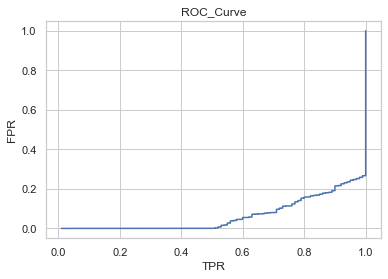

In [56]:
import matplotlib.pyplot as plt
plt.plot(TPR,FPR)
plt.title('ROC_Curve')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show

In [17]:
AUC_score = np.trapz(sorted(TPR), sorted(FPR))   # computing area under the curve usirng trapezoidal rule.
AUC_score

0.48829900000000004



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [18]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [19]:
y_pred =[]
for x in df_b["proba"]:
    if x<0.5:    #will assign 0 if probability is less than 0.5
        y_pred.append(0.0)
    else:
        y_pred.append(1.0)
#print(y_pred)        

In [20]:
df_b.insert(2, "y_predicted", y_pred, False) # inserting a new column predicted y score.
df_b

,y,proba,y_predicted
0,0.0,0.281035,0.0
1,0.0,0.465152,0.0
2,0.0,0.352793,0.0
3,0.0,0.157818,0.0
4,0.0,0.276648,0.0
...,...,...,...
10095,0.0,0.474401,0.0
10096,0.0,0.128403,0.0
10097,0.0,0.499331,0.0
10098,0.0,0.157616,0.0


<AxesSubplot:xlabel='proba', ylabel='y_predicted'>

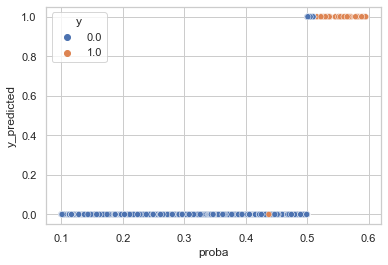

In [21]:
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.scatterplot(x= "proba",y= "y_predicted", data = df_b, hue = "y")

Some of the points are incorrectly classified as class 1 but it was from class 0.

In [22]:
#Checking how many datapoints are there whose probability is greater than 0.5
df_b[df_b["proba"]>0.5].count()   #points from class 1.

y              294
proba          294
y_predicted    294
dtype: int64

In [23]:
df_b[df_b["proba"]<0.5].count()  #points from class 0.

y              9806
proba          9806
y_predicted    9806
dtype: int64

In [24]:
confussion_Matrix(df_b)

[[9761, 45], [239, 55]]

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_b["y"],df_b["y_predicted"])

array([[9761,  239],
       [  45,   55]])

In [26]:
precision(confussion_Matrix(df_b))

0.1870748299319728

In [27]:
Recall(confussion_Matrix(df_b))

0.55

In [28]:
F1_Score(precision(confussion_Matrix(df_b)),Recall(confussion_Matrix(df_b)))

0.2791878172588833

In [29]:
Accuracy(df_b)

0.9718811881188119

In [30]:
TPR,FPR  = AUC_Score(df_b.copy())

100%|████████████████████████████████████| 10100/10100 [00:24<00:00, 406.39it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

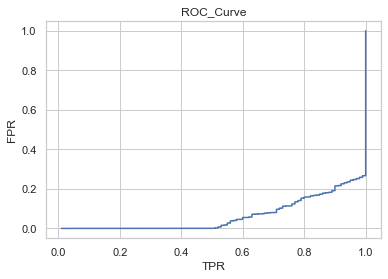

In [57]:
import matplotlib.pyplot as plt
plt.plot(TPR,FPR)
plt.title('ROC_Curve')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show

In [32]:
AUC_score = np.trapz(sorted(TPR),sorted(FPR)) 
AUC_score

0.9377570000000001

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [33]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [34]:
df_c.rename(columns = {"prob" : "proba"}, inplace = True)

In [35]:
y_pred =[]
for x in df_c["proba"]:
    if x<0.5:    #will assign 0 if probability is less than 0.5
        y_pred.append(0.0)
    else:
        y_pred.append(1.0)
#print(y_pred) 

In [36]:
df_c.insert(2, "y_predicted", y_pred, False) # inserting a new column predicted y score.
df_c

,y,proba,y_predicted
0,0,0.458521,0.0
1,0,0.505037,1.0
2,0,0.418652,0.0
3,0,0.412057,0.0
4,0,0.375579,0.0
...,...,...,...
2847,1,0.491663,0.0
2848,1,0.292109,0.0
2849,1,0.659161,1.0
2850,1,0.456265,0.0


<AxesSubplot:xlabel='proba', ylabel='y_predicted'>

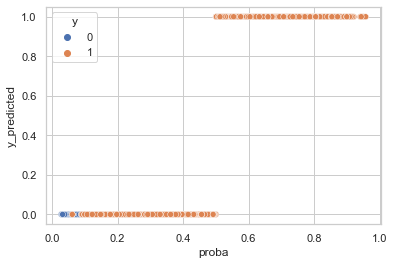

In [37]:
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.scatterplot(x= "proba",y= "y_predicted", data = df_c, hue = "y")

In [38]:
confussion_Matrix(df_c)

[[1637, 462], [168, 585]]

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_c["y"],df_c["y_predicted"])

array([[1637,  168],
       [ 462,  585]])

In [40]:
from tqdm import tqdm
def Matrix_A(df):
    FN_lst =[]  # will store the FN for each threshold here.
    FP_lst =[]  # will store the FP for each threshold here.
    df = df.sort_values(by = ["proba"], ascending = False)
    Length = len(df["y"])
    for threshold in tqdm(df["proba"].unique()): 
        df['y_predicted'] = np.where( df['proba'] >=  threshold, 1,0)
        
        FN = 500*(((df['y'] == 1.0 ) & (df['y_predicted'] == 0.0)).sum())
        FN_lst.append((FN,threshold))
        FP = 100*(((df['y'] == 0.0 ) & (df['y_predicted'] == 1.0)).sum())
        FP_lst.append((FP,threshold) )       
    return FN_lst, FP_lst

In [41]:
FN_lst, FP_lst = Matrix_A(df_c.copy())

100%|██████████████████████████████████████| 2791/2791 [00:04<00:00, 688.38it/s]


In [42]:
lst_sum = []
lst_threshold = []
for x in range (len(FP_lst)-1):
    lst_sum.append(FN_lst[x][0]+FP_lst[x][0])
    lst_threshold.append(FP_lst[x][1])

<function matplotlib.pyplot.show(close=None, block=None)>

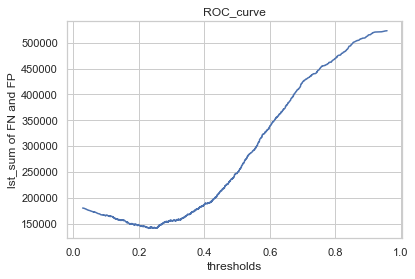

In [43]:
import matplotlib.pyplot as plt
plt.plot(lst_threshold,lst_sum)
plt.title('ROC_curve')
plt.xlabel('thresholds')
plt.ylabel('lst_sum of FN and FP')
plt.show

Conclussion: The threshold value need to close to 0.4 for the minimum value of A.

In [44]:
dictionary = dict(zip(lst_sum,lst_threshold))  #creating a dict. 
A = dict(sorted(dictionary.items(), key=lambda item: item[0]))

In [45]:
dict_pairs = A.items()
pairs_iterator = iter(dict_pairs)
first_pair = next(pairs_iterator)
print(first_pair)

(141000, 0.2300390278970873)


The minimum value of matrix A is 141000 and it is possible at threshold 0.2300....


### D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE:</li>
<li> Compute R^2 error: </li>
</ol>
</pre>

In [46]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [47]:
Sum_of_sqr_error = 0 
for x in tqdm(range(len(df_d["y"]))):
    Sum_of_sqr_error = Sum_of_sqr_error + (df_d["y"][x] - df_d["pred"][x])**2
    MSE = Sum_of_sqr_error/(len(df_d["y"]))

100%|████████████████████████████████| 157200/157200 [00:03<00:00, 49747.86it/s]


In [48]:
print(MSE)  

177.16569974554707


In [49]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_d["y"],df_d["pred"])

177.16569974554707

### mean_absolute_percentage_error

In [50]:
Abs_Error_sum = 0 
Sum_of_Act_y = 0
for x in tqdm(range(len(df_d["y"]))):
    Abs_Error_sum = Abs_Error_sum + abs(df_d["y"][x] - df_d["pred"][x])
    Sum_of_Act_y = Sum_of_Act_y + df_d["y"][x]
Modified_MAPE = Abs_Error_sum/Sum_of_Act_y    

100%|████████████████████████████████| 157200/157200 [00:03<00:00, 48298.11it/s]


In [51]:
Modified_MAPE

0.1291202994009687

### Coefficient of determiination.

In [52]:
# determining the average of y.
Sum_of_y = 0
for x in tqdm(range(len(df_d["y"]))):
    Sum_of_y = Sum_of_y + df_d["y"][x]
avg_of_y = Sum_of_y/(len(df_d["y"]))

100%|███████████████████████████████| 157200/157200 [00:01<00:00, 121209.51it/s]


In [53]:
Sum_of_sqr_err_Mean = 0
for x in tqdm(range(len(df_d["y"]))):
    Sum_of_sqr_err_Mean = Sum_of_sqr_err_Mean + (df_d["y"][x] - avg_of_y)**2

100%|███████████████████████████████| 157200/157200 [00:01<00:00, 140274.86it/s]


In [54]:
Sum_of_sqr_error = 0 
for x in tqdm(range(len(df_d["y"]))):
    Sum_of_sqr_error = Sum_of_sqr_error + (df_d["y"][x] - df_d["pred"][x])**2

100%|████████████████████████████████| 157200/157200 [00:02<00:00, 71345.85it/s]


In [55]:
Coeff_deter = 1-(Sum_of_sqr_error/Sum_of_sqr_err_Mean)
print(Coeff_deter)

0.9563582786990964
